<a href="https://colab.research.google.com/github/mirianfsilva/The-Heat-Diffusion-Equation/blob/master/FiniteDifferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementation of schemes for the Heat Equation:
- Forward Time, Centered Space;
- Backward Time, Centered Space;
- Crank-Nicolson.


\begin{equation}
    \delta_{t}u = \delta^2_{x}u , \quad 0 < x < 1, \quad t > 0 \\
\end{equation}
\begin{equation}
    \delta_{x}u(0,t) = 0, \quad \delta_x{u}(1,t) = 0\\
\end{equation}
\begin{equation}
    u(x, 0) = 1/2 + cos(2 \pi x) - 1/2 cos(3 \pi x)
\end{equation}

### Exact Solution: 
\begin{equation}
    u(x,t) = \frac{1}{2} + e^{-4\pi^2t}cos(2\pi x) - \frac{1}{2} e^{-9\pi^2t}cos(3\pi x)
\end{equation}


In [0]:
#Numerical Differential Equations - Federal University of Minas Gerais
""" Utils """
import math, sys 
import numpy as np
import sympy as sp
from scipy import sparse
from sympy import fourier_series, pi
from scipy.fftpack import *
from scipy.sparse import diags
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from os import path
count = 0

In [0]:
#Heat Diffusion in one dimensional wire within the Explicit Method
"""
λ = 2, λ = 1/2 e λ = 1/6
M = 4, M = 8, M = 10, M = 12 e M = 14
"""
#Checks if the solution is correct, used in each method:
    #gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
    #print(gc)
    
#Initial Conditions
def initialConditions(x,t):
    return ((1.0/2.0)+ np.cos(2.0*pi*x) - (1.0/2.0)*np.cos(3*pi*x))

#Heat function exact solution
def Solution(x, t):
    return 1.0/2.0 + np.exp(-4*np.square(np.pi)*t)*np.cos(2*np.pi*x) - 1.0/2.0*np.exp(-9*np.square(np.pi)*t)*np.cos(3*np.pi*x)

In [0]:
# ---- Surface plot ----
def surfaceplot(U, Uexact, tspan, xspan, M): 
    N = M**2
    #meshgrid : Return coordinate matrices from coordinate vectors
    X, T = np.meshgrid(tspan, xspan)
    fig = plt.figure(figsize=plt.figaspect(0.3))
    #fig2 = plt.figure(figsize=plt.figaspect(0.5))
    #fig3 = plt.figure(figsize=plt.figaspect(0.5))
    
    # ---- Exact Solution ----
    ax = fig.add_subplot(1, 4, 1,projection='3d')
    surf = ax.plot_surface(X, T, Uexact, linewidth=0, cmap=cm.jet, antialiased=True)
    ax.set_title('Exact Solution')
    ax.set_xlabel('Time')
    ax.set_ylabel('Space')
    ax.set_zlabel('U')
    
    # ---- Method Aproximation Solution ----
    ax1 = fig.add_subplot(1, 4, 2,projection='3d')
    surf = ax1.plot_surface(X, T, U, linewidth=0, cmap=cm.jet, antialiased=True)
    ax1.set_title('Approximation')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Space')
    ax1.set_zlabel('U')
    
    
    # ---- Absolute Error ----
    ax2 = fig.add_subplot(1, 4, 3, projection='3d')
    surf2 = ax2.plot_surface(X, T, abs(Uexact-U), linewidth=0, cmap=cm.jet, antialiased=True)
    ax2.set_title('Absolute Error')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Space')
    ax2.set_zlabel('Error')
    
    # ---- Relative Error ---- 
    Urelative = np.zeros((M, N))

    for i in range(0, M):
        for j in range(0, N):
              Urelative[i][j] = Uexact[i][j] - U[i][j] / Uexact[i][j]
    
          
    ax3 = fig.add_subplot(1, 4, 4, projection='3d')
    surf3 = ax3.plot_surface(X, T, abs(Urelative), linewidth=0, cmap=cm.jet, antialiased=True)
    ax3.set_title('Relative Error')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Space')
    ax3.set_zlabel('Error')
    
    plt.tight_layout()
    ax.view_init(30,230)
    ax1.view_init(30,230)
    ax2.view_init(30,230)
    ax3.view_init(30,230)
    
    fig.savefig(path.join("plot_METHOD{0}.png".format(count)),dpi=600)
    plt.draw()

In [0]:
'''
Exact Solution for 1D reaction-diffusion equation:
        u_t = k * u_xx
    
with Neumann boundary conditions 
at x=0: u_x(0,t) = 0 = sin(2*np.pi)
at x=L: u_x(L,t) = 0 = sin(2*np.pi)

with L = 1 and initial conditions:
u(x,0) = (1.0/2.0)+ np.cos(2.0*np.pi*x) - (1.0/2.0)*np.cos(3*np.pi*x)
'''

def ExactSolution(M, T = 0.5, L = 1):
    N = (M**2) #GRID POINTS on time interval

    xspan = np.linspace(0, L, M)
    tspan = np.linspace(0, T, N)
    
    Uexact = np.zeros((M, N))
    
    for i in range(0, M):
        for j in range(0, N):
            Uexact[i][j] = Solution(xspan[i], tspan[j])
    
    return (Uexact, tspan, xspan)

def plotexact(Uexact,tspan, xspan):
    #meshgrid : Return coordinate matrices from coordinate vectors
    X, T = np.meshgrid(tspan, xspan)
    fig = plt.figure(figsize = (7.5,5.5))
    
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, T, Uexact, linewidth=0, cmap=cm.jet, antialiased=True)
    ax.set_xlabel('Time')
    ax.set_ylabel('Space')
    ax.set_zlabel('U')
    
    plt.tight_layout()
    ax.view_init(30,230)
    fig.savefig(path.join("plot_exact{0}.png".format(count)))
    plt.draw()

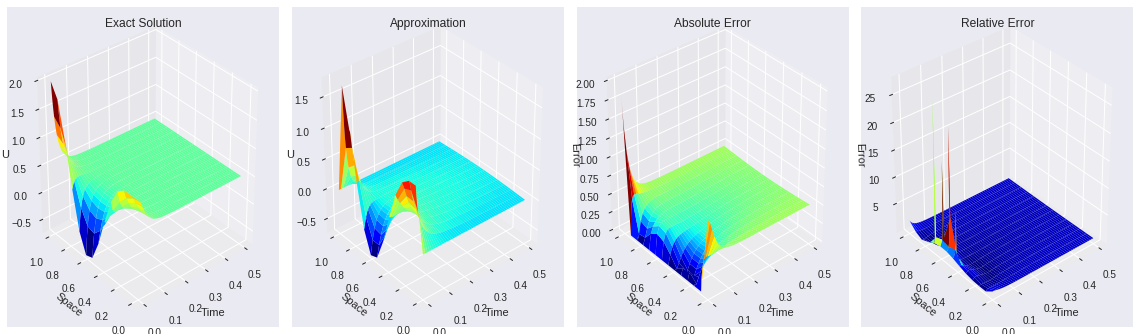

In [98]:
'''
Forward method to solve 1D reaction-diffusion equation:
        u_t = k * u_xx
    
with Neumann boundary conditions 
at x=0: u_x(0,t) = 0 = sin(2*np.pi)
at x=L: u_x(L,t) = 0 = sin(2*np.pi)

with L = 1 and initial conditions:
u(x,0) = (1.0/2.0)+ np.cos(2.0*np.pi*x) - (1.0/2.0)*np.cos(3*np.pi*x)

u_x(x,t) = (-4.0*(np.pi**2))np.exp(-4.0*(np.pi**2)*t)*np.cos(2.0*np.pi*x) + 
            (9.0/2.0)*(np.pi**2)*np.exp(-9.0*(np.pi**2)*t)*np.cos(3*np.pi*x))
'''

def ForwardEuler(M, lambd, T = 0.5, L = 1, k = 1): 
    #Parameters needed to solve the equation within the explicit method
    #M = GRID POINTS on space interval
    N = (M**2) #GRID POINTS on time interval

    # ---- Length of the wire in x direction ---- 
    x0, xL = 0, L 

    # ----- Spatial discretization step -----
    dx = (xL - x0)/(M)

    # ---- Final time ---- 
    t0, tF = 0, T 

    # ----- Time step -----
    dt = (tF - t0)/(N)

    #lambd = dt*k/dx**2
    # ----- Creates grids -----
    xspan = np.linspace(x0, xL, M)
    tspan = np.linspace(t0, tF, N)

    # ----- Initializes matrix solution U -----
    U = np.zeros((M, N))

    # ----- Initial condition -----
    U[:,0] = (1.0/2.0)+ np.cos(2.0*np.pi*xspan) - (1.0/2.0)*np.cos(3*np.pi*xspan)

    # ----- Neumann boundary conditions -----
    U[0,:] = 0.0
    U[-1,:] = 0.0

    # -----  ftcs -----
    for k in range(0, N-1):
        for i in range(1, M-1):
            U[i, k+1] = lambd*U[i-1, k] + (1-2*lambd)*U[i,k] + lambd*U[i+1,k] 
            
    return (U, tspan, xspan)

U, tspan, xspan = ForwardEuler(M = 14, lambd = 1.0/6.0)
Uexact, x, t = ExactSolution(M = 14)
surfaceplot(U, Uexact, tspan, xspan, M = 14)

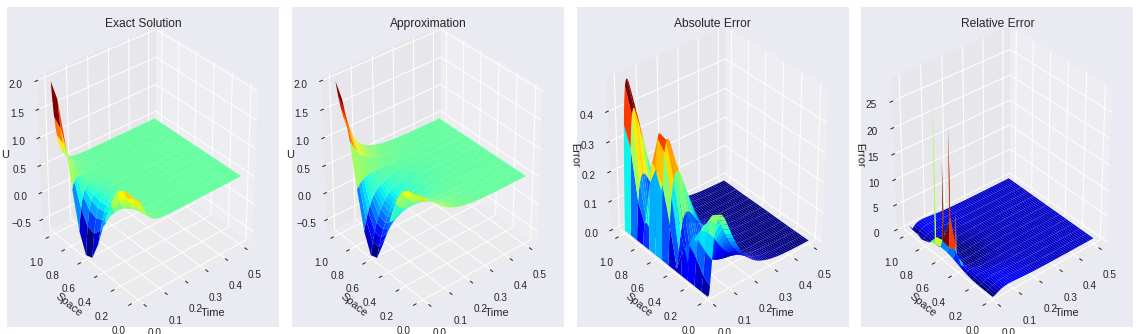

In [99]:
'''
Backward method to solve 1D reaction-diffusion equation:
        u_t = k * u_xx
    
with Neumann boundary conditions 
at x=0: u_x(0,t) = 0 = sin(2*np.pi)
at x=L: u_x(L,t) = 0 = sin(2*np.pi)

with L = 1 and initial conditions:
u(x,0) = (1.0/2.0)+ np.cos(2.0*np.pi*x) - (1.0/2.0)*np.cos(3*np.pi*x)

u_x(x,t) = (-4.0*(np.pi**2))np.exp(-4.0*(np.pi**2)*t)*np.cos(2.0*np.pi*x) + 
            (9.0/2.0)*(np.pi**2)*np.exp(-9.0*(np.pi**2)*t)*np.cos(3*np.pi*x))
'''
def BackwardEuler(M, lambd, T = 0.5, L = 1, k = 1):
    #Parameters needed to solve the equation within the explicit method
    # M = GRID POINTS on space interval
    N = (M**2) #GRID POINTS on time interval

    # ---- Length of the wire in x direction ---- 
    x0, xL = 0, L 

    # ----- Spatial discretization step -----
    dx = (xL - x0)/(M-1)

    # ---- Final time ---- 
    t0, tF = 0, T 

    # ----- Time step -----
    dt = (tF - t0)/(N-1)

    # k = 1.0 Diffusion coefficient
    #lambd = dt*k/dx**2
    a = 1 + 2*lambd

    xspan = np.linspace(x0, xL, M)
    tspan = np.linspace(t0, tF, N)

    main_diag = (1 + 2*lambd)*np.ones((1,M))
    off_diag = -lambd*np.ones((1, M-1))
    a = main_diag.shape[1]
    diagonals = [main_diag, off_diag, off_diag]

    #Sparse Matrix diagonals
    A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
    A[0,1] = -2*lambd
    A[M-1,M-2] = -2*lambd

    # --- Initializes matrix U -----
    U = np.zeros((M, N))

    # --- Initial condition -----
    U[:,0] = (1.0/2.0)+ np.cos(2.0*np.pi*xspan) - (1.0/2.0)*np.cos(3*np.pi*xspan)

    # ---- Neumann boundary conditions -----
    leftBC = np.arange(1, N+1)
    f = np.sin(2*leftBC*np.pi) #f = U[0,:] 

    rightBC = np.arange(1, N+1)
    g = np.sin(2*rightBC*np.pi) #g = U[-1,:]

    for i in range(1, N):
        c = np.zeros((M-2,1)).ravel()
        b1 = np.asarray([2*lambd*dx*f[i], 2*lambd*dx*g[i]])
        b1 = np.insert(b1, 1, c)
        b2 = np.array(U[0:M, i-1])
        b = b1 + b2  # Right hand side
        U[0:M, i] = np.linalg.solve(A,b)  # Solve x=A\b
    
    return (U, tspan, xspan)

U, tspan, xspan = BackwardEuler(M = 14, lambd = 1.0/6.0)
Uexact, x, t = ExactSolution(M = 14)
surfaceplot(U, Uexact, tspan, xspan, M = 14)

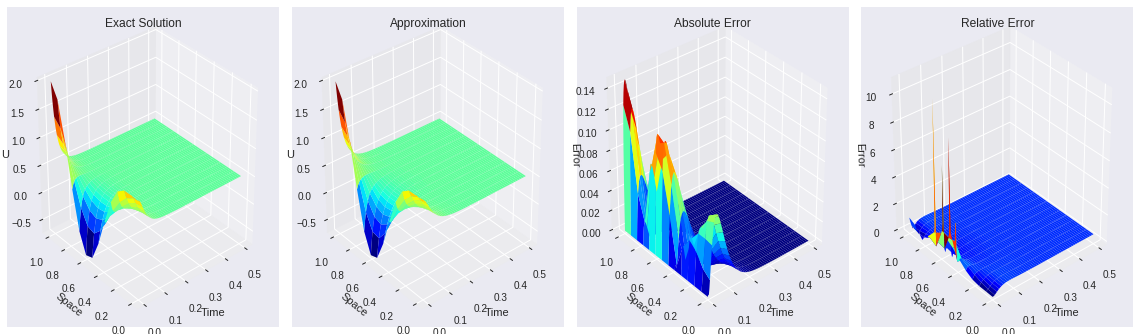

In [100]:
'''
Crank-Nicolson method to solve 1D reaction-diffusion equation:
        u_t = D * u_xx
    
with Neumann boundary conditions 
at x=0: u_x = sin(2*pi)
at x=L: u_x = sin(2*pi) 

with L=1 and initial condition:
u(x,0) = u(x,0) = (1.0/2.0)+ np.cos(2.0*np.pi*x) - (1.0/2.0)*np.cos(3*np.pi*x)
'''
def CrankNicolson(M, lambd, T = 0.5, L = 1, k = 1):
    #Parameters needed to solve the equation within the explicit method
    # M = GRID POINTS on space interval
    N = (M**2) #GRID POINTS on time interval

    # ---- Length of the wire in x direction ---- 
    x0, xL = 0, L

    # ----- Spatial discretization step -----
    dx = (xL - x0)/(M-1)

    # ---- Final time ---- 
    t0, tF = 0, T 

    # ----- Time step -----
    dt = (tF - t0)/(N-1)

    #lambd = dt*k/(2.0*dx**2)
    a0 = 1 + 2*lambd
    c0 = 1 - 2*lambd

    xspan = np.linspace(x0, xL, M)
    tspan = np.linspace(t0, tF, N)

    maindiag_a0 = a0*np.ones((1,M))
    offdiag_a0 = (-lambd)*np.ones((1, M-1))

    maindiag_c0 = c0*np.ones((1,M))
    offdiag_c0 = lambd*np.ones((1, M-1))

    #Left-hand side tri-diagonal matrix
    a = maindiag_a0.shape[1]
    diagonalsA = [maindiag_a0, offdiag_a0, offdiag_a0]
    A = sparse.diags(diagonalsA, [0,-1,1], shape=(a,a)).toarray()
    
    A[0,1] = (-2)*lambd
    A[M-1,M-2] = (-2)*lambd

    #Right-hand side tri-diagonal matrix
    c = maindiag_c0.shape[1]
    diagonalsC = [maindiag_c0, offdiag_c0, offdiag_c0]
    
    Arhs = sparse.diags(diagonalsC, [0,-1,1], shape=(c,c)).toarray()
    Arhs[0,1] = 2*lambd
    Arhs[M-1,M-2] = 2*lambd

    # ----- Initializes matrix U -----
    U = np.zeros((M, N))

    #----- Initial condition -----
    U[:,0] = (1.0/2.0)+ np.cos(2.0*np.pi*xspan) - (1.0/2.0)*np.cos(3*np.pi*xspan)

    #----- Neumann boundary conditions -----
    #Add one line above and one line below using finit differences 
    leftBC = np.arange(1, N+1)
    f = np.sin(2*leftBC*np.pi)

    rightBC = np.arange(1, N+1)
    g = np.sin(2*rightBC*np.pi)

    for k in range(1, N):
        ins = np.zeros((M-2,1)).ravel()
        b1 = np.asarray([4*lambd*dx*f[k], 4*lambd*dx*g[k]])
        b1 = np.insert(b1, 1, ins)
        b2 = np.matmul(Arhs, np.array(U[0:M, k-1]))
        b = b1 + b2  # Right hand side
        U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b
    
    return (U, tspan, xspan)

U, tspan, xspan = CrankNicolson(M = 14, lambd = 1.0/6.0)
Uexact, x, t = ExactSolution(M = 14)
surfaceplot(U, Uexact, tspan, xspan, M = 14)

<---- M =  4 , N =  16 , Lambda =  2 ---->
<---- M =  4 , N =  16 , Lambda =  0.5 ---->
<---- M =  4 , N =  16 , Lambda =  0.17 ---->
<---- M =  8 , N =  64 , Lambda =  2 ---->
<---- M =  8 , N =  64 , Lambda =  0.5 ---->
<---- M =  8 , N =  64 , Lambda =  0.17 ---->
<---- M =  14 , N =  196 , Lambda =  2 ---->
<---- M =  14 , N =  196 , Lambda =  0.5 ---->
<---- M =  14 , N =  196 , Lambda =  0.17 ---->


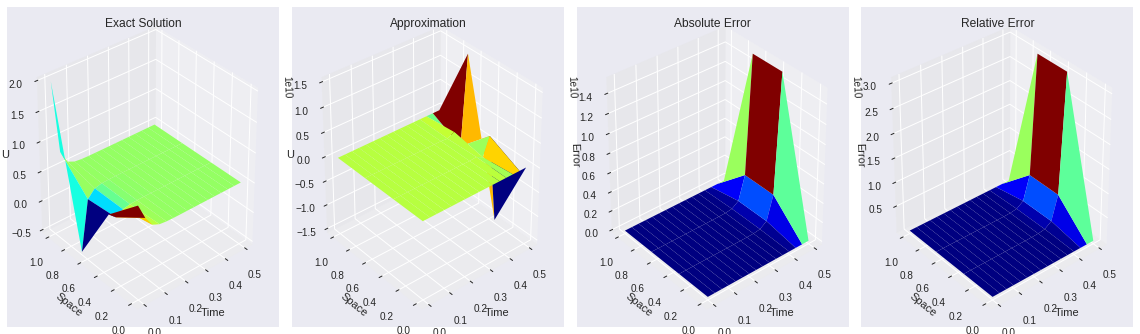

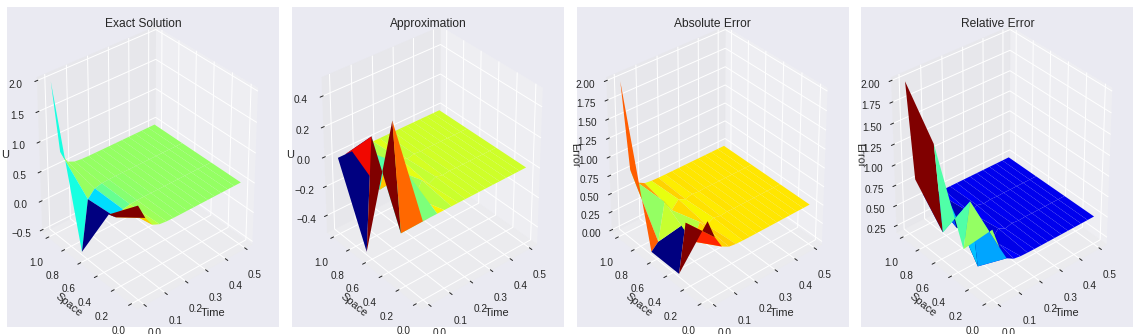

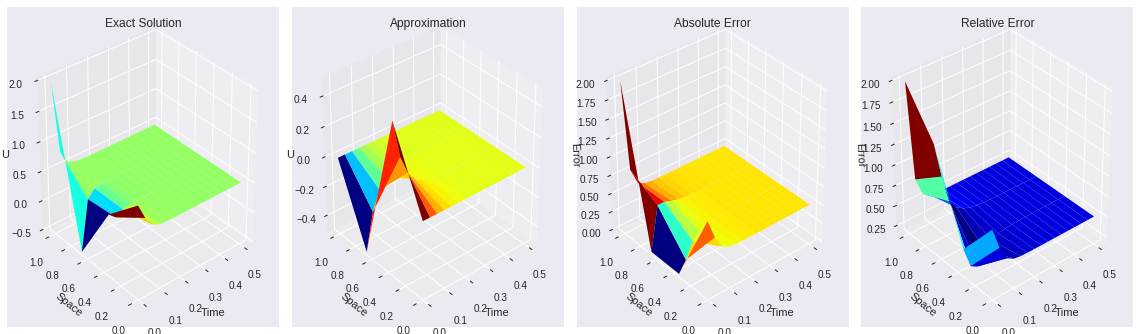

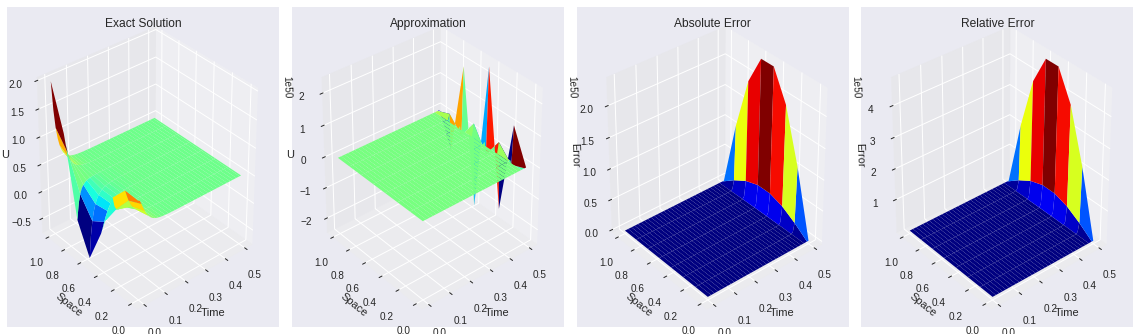

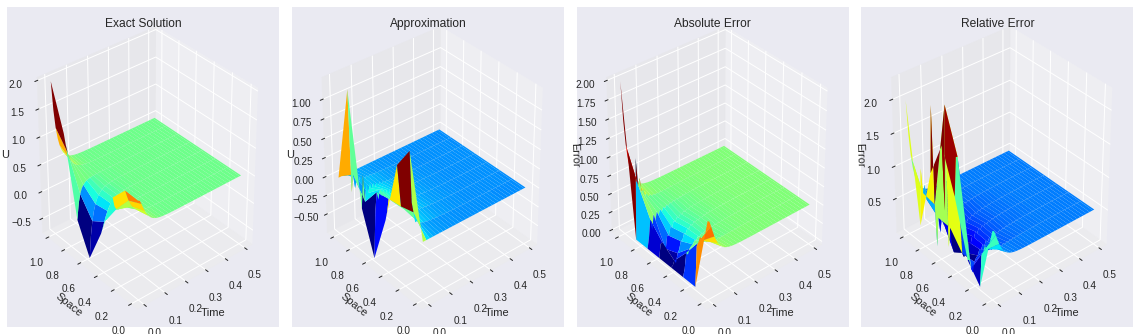

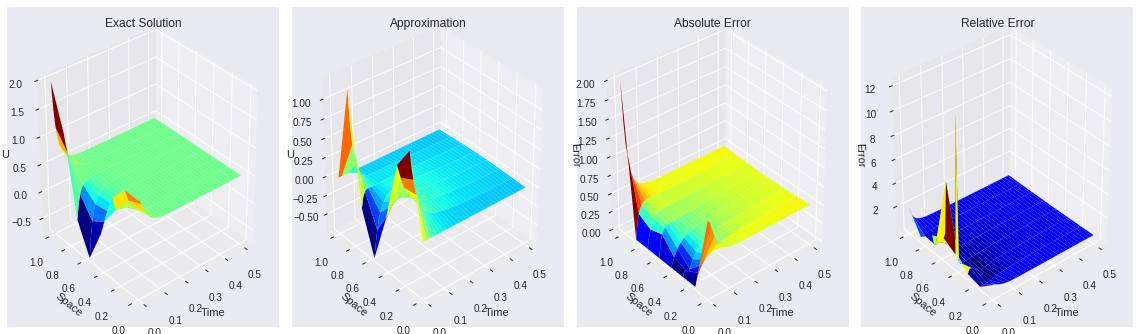

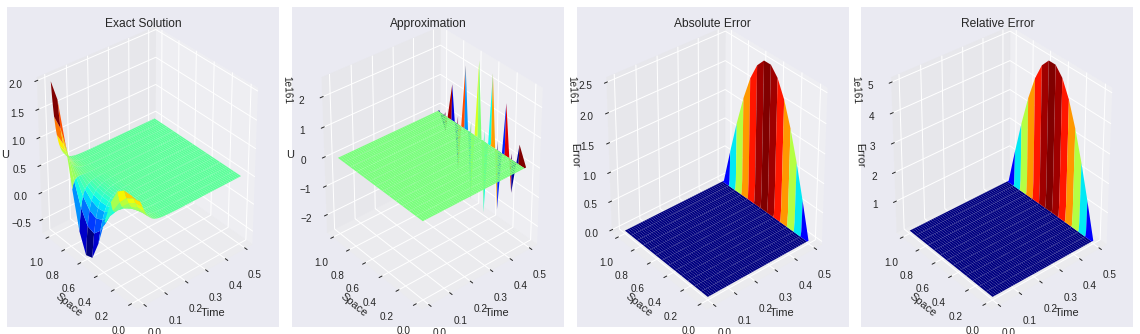

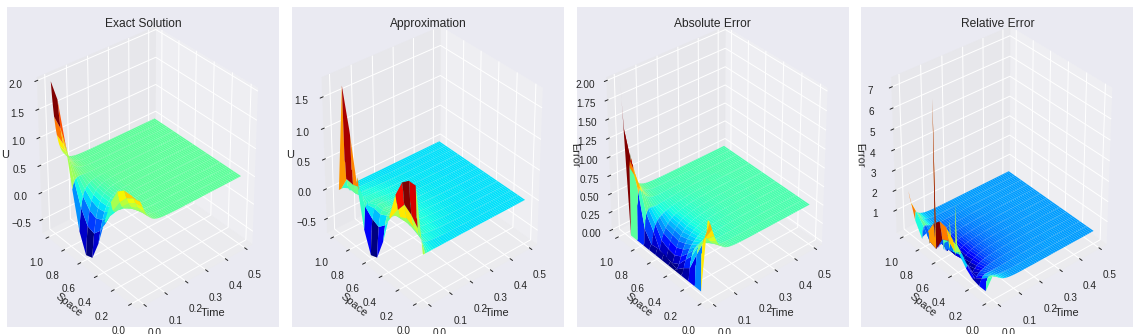

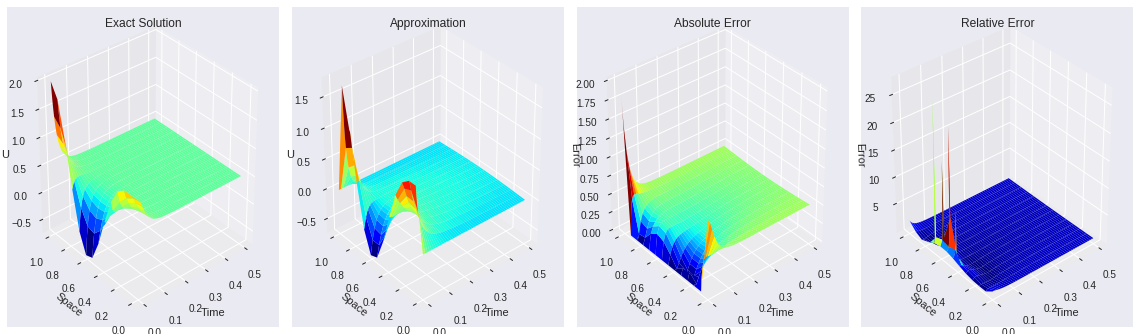

In [101]:
""" 
Comparison:
"""
lambd = [2, 1.0/2.0, 1.0/6.0]
M = [4, 8, 14]
#10, 12,

count = 0

for i in range(len(M)):
    for j in range(len(lambd)):
        Uexact, x, t = ExactSolution(M[i])
        N = M[i]**2
        U_ftcs, tspanf, xspanf = ForwardEuler(M[i], lambd[j])
        print("<---- M = ", M[i],", N = ", M[i]**2,", Lambda = ",round(lambd[j],2),"---->")
        surfaceplot(U_ftcs, Uexact, tspanf, xspanf, M[i])
        count+=1 

<---- M =  4 , N =  16 , Lambda =  2 ---->
<---- M =  4 , N =  16 , Lambda =  0.5 ---->
<---- M =  4 , N =  16 , Lambda =  0.17 ---->
<---- M =  8 , N =  64 , Lambda =  2 ---->
<---- M =  8 , N =  64 , Lambda =  0.5 ---->
<---- M =  8 , N =  64 , Lambda =  0.17 ---->
<---- M =  14 , N =  196 , Lambda =  2 ---->
<---- M =  14 , N =  196 , Lambda =  0.5 ---->
<---- M =  14 , N =  196 , Lambda =  0.17 ---->


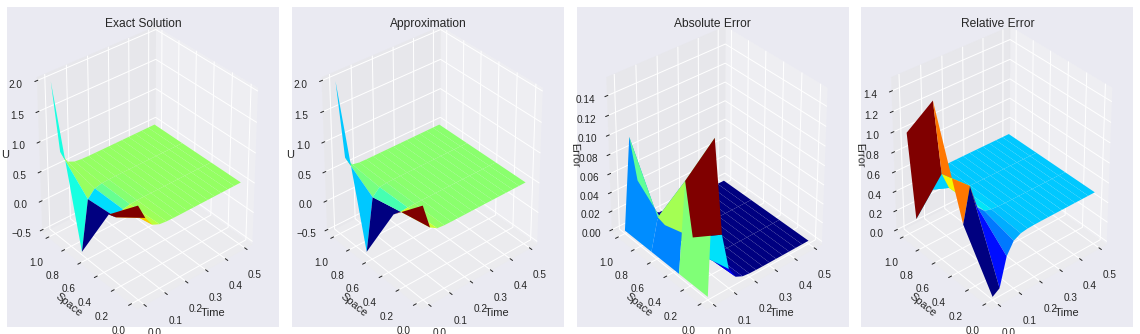

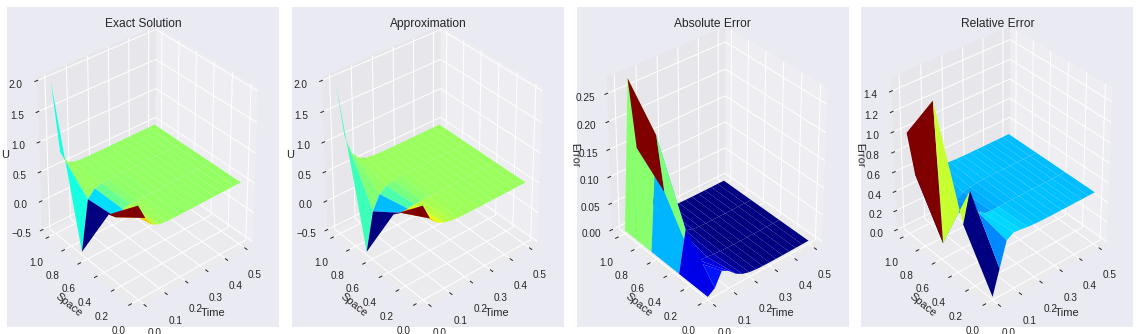

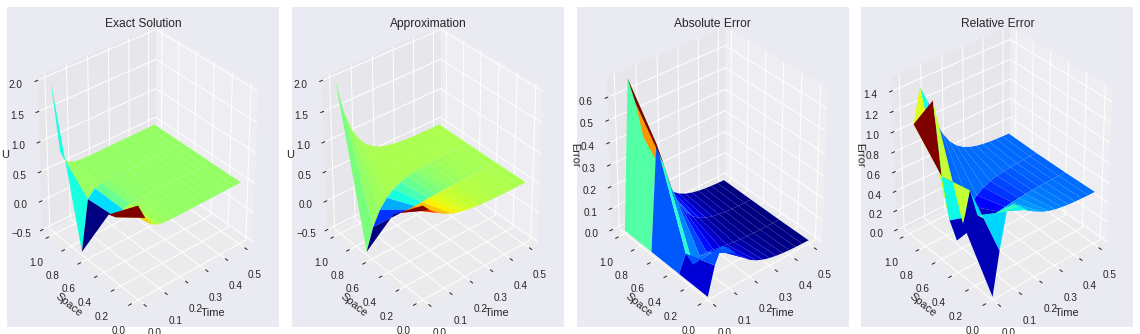

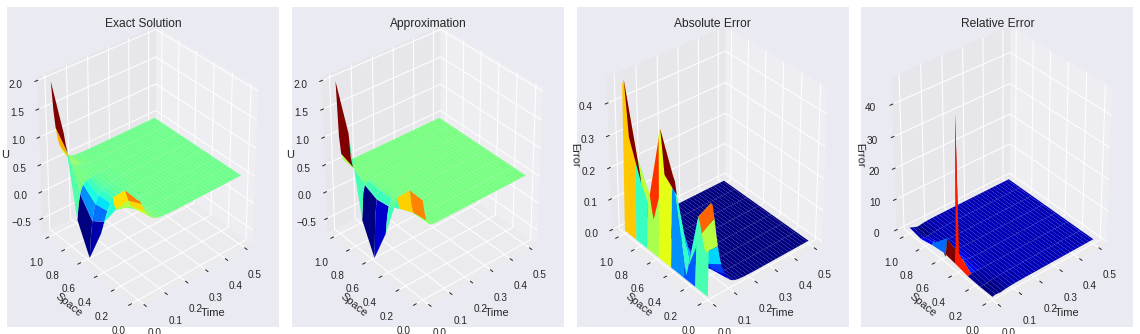

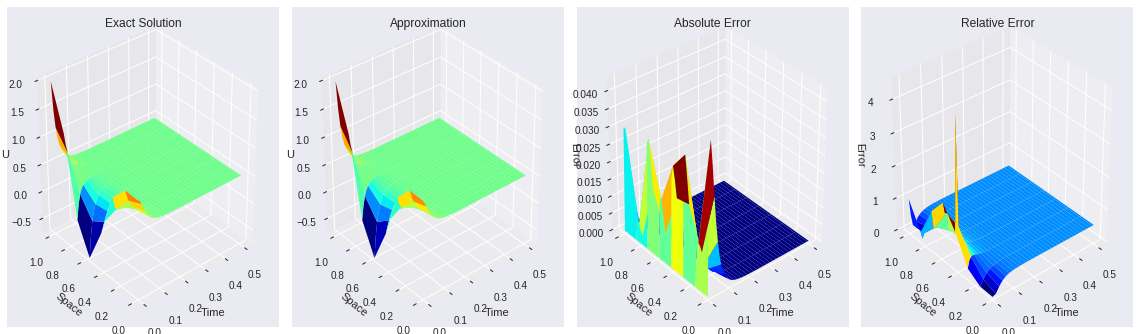

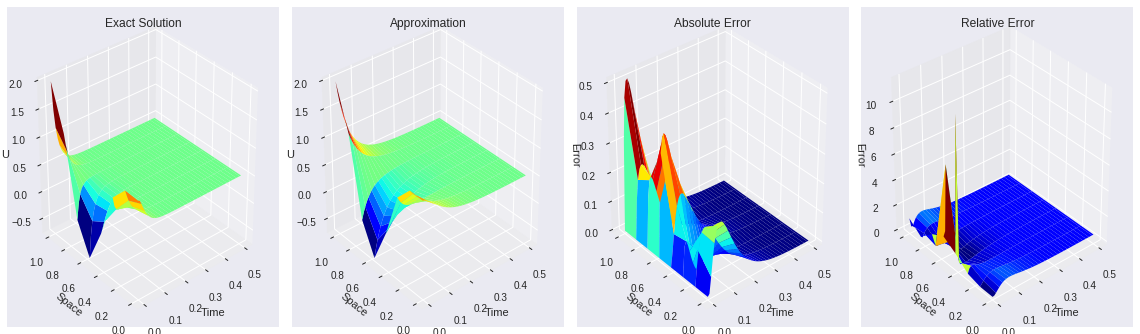

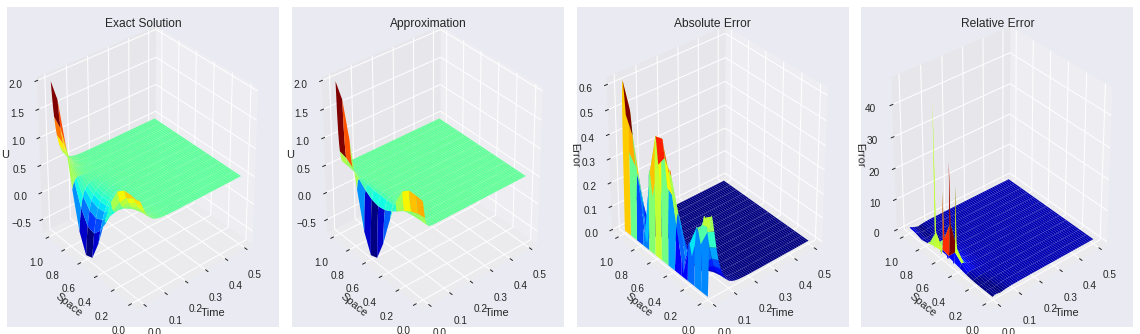

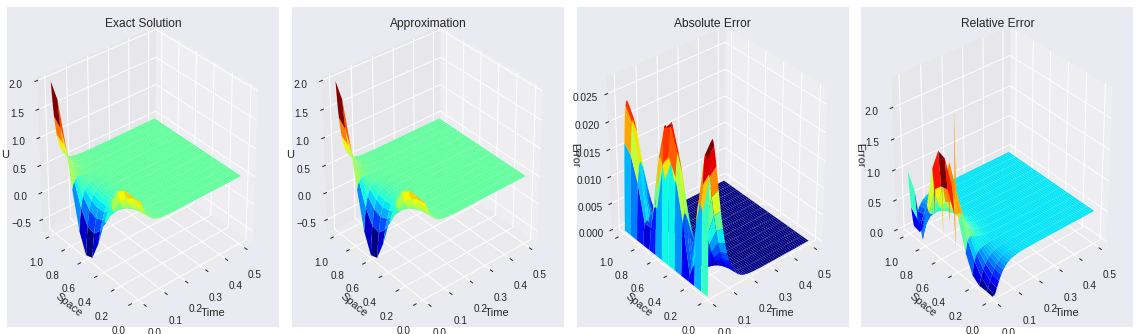

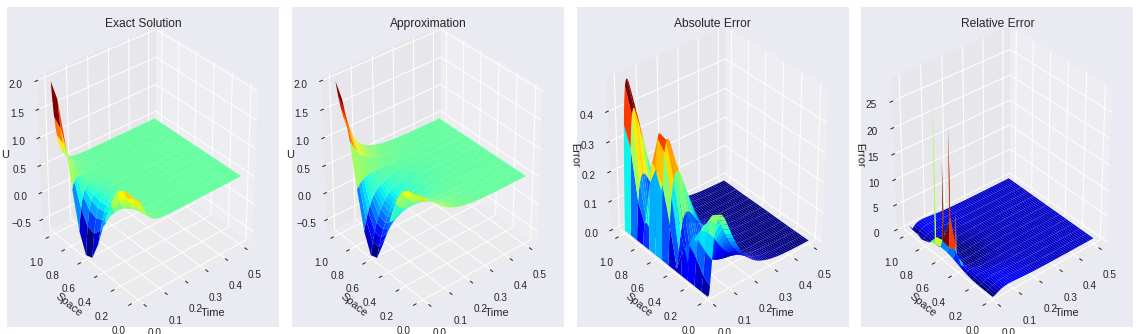

In [102]:
""" 
Comparison:
"""
lambd = [2, 1.0/2.0, 1.0/6.0]
M = [4, 8, 14]
#10, 12,

for i in range(len(M)):
    for j in range(len(lambd)):
        Uexact, x, t = ExactSolution(M[i])
        print("<---- M = ", M[i],", N = ", M[i]**2,", Lambda = ",round(lambd[j],2),"---->")
        U_btcs, tspanb, xspanb = BackwardEuler(M[i], lambd[j])
        surfaceplot(U_btcs, Uexact, tspanb, xspanb, M[i])
        count+=1
        

<---- M =  4 , N =  16 , Lambda =  2 ---->
<---- M =  4 , N =  16 , Lambda =  0.5 ---->
<---- M =  4 , N =  16 , Lambda =  0.17 ---->
<---- M =  8 , N =  64 , Lambda =  2 ---->
<---- M =  8 , N =  64 , Lambda =  0.5 ---->
<---- M =  8 , N =  64 , Lambda =  0.17 ---->
<---- M =  14 , N =  196 , Lambda =  2 ---->
<---- M =  14 , N =  196 , Lambda =  0.5 ---->
<---- M =  14 , N =  196 , Lambda =  0.17 ---->


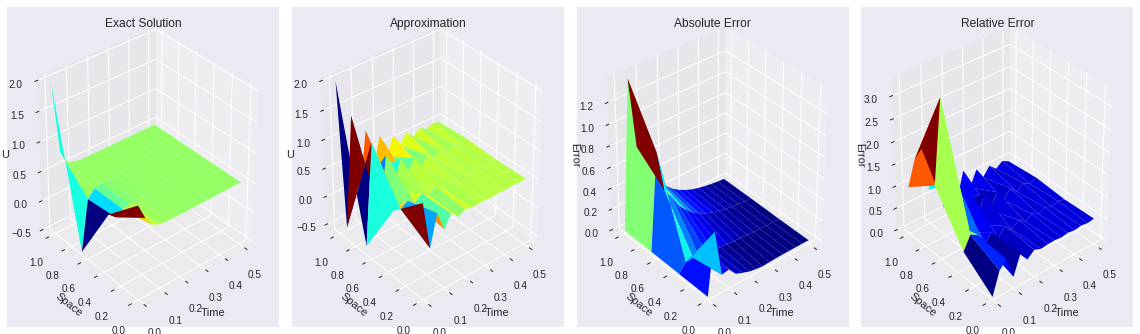

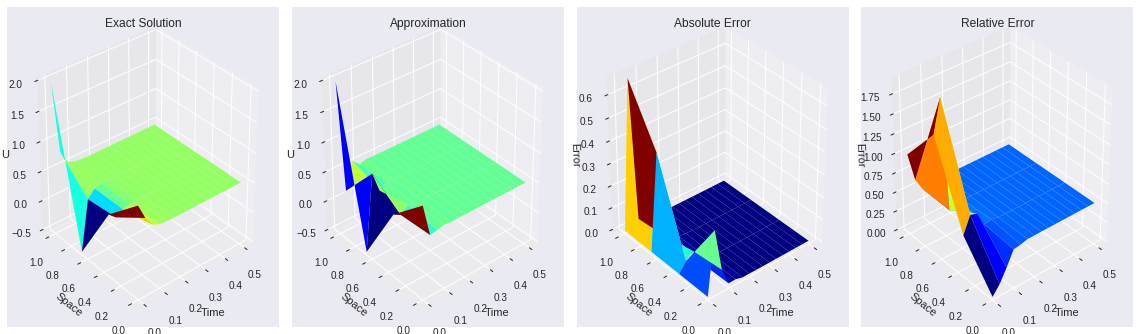

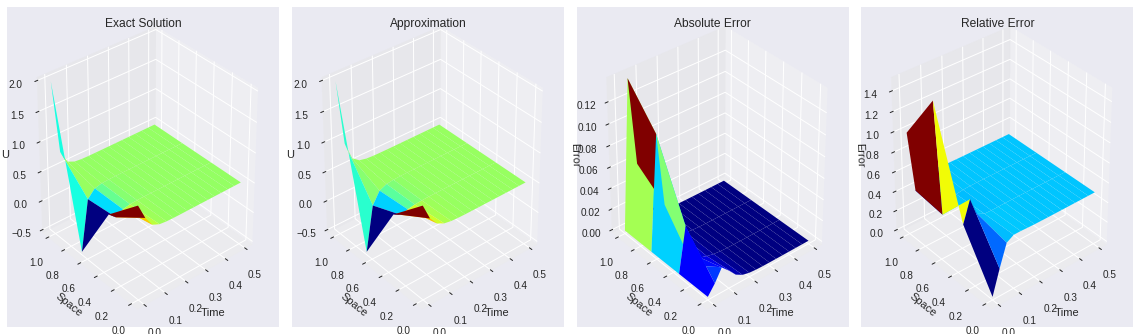

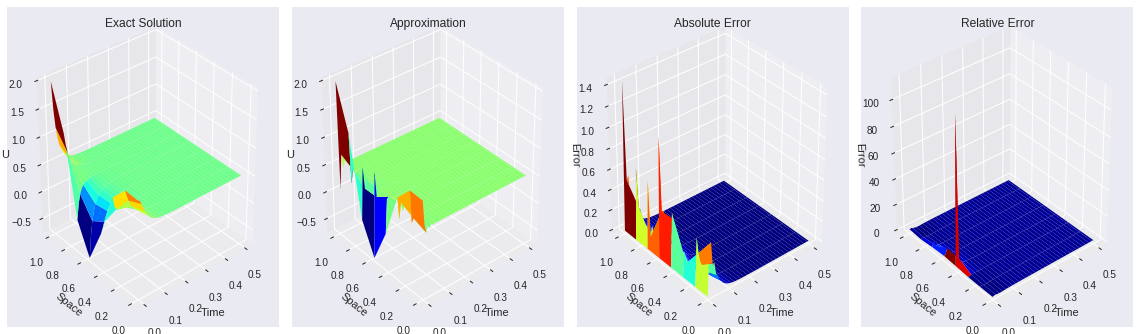

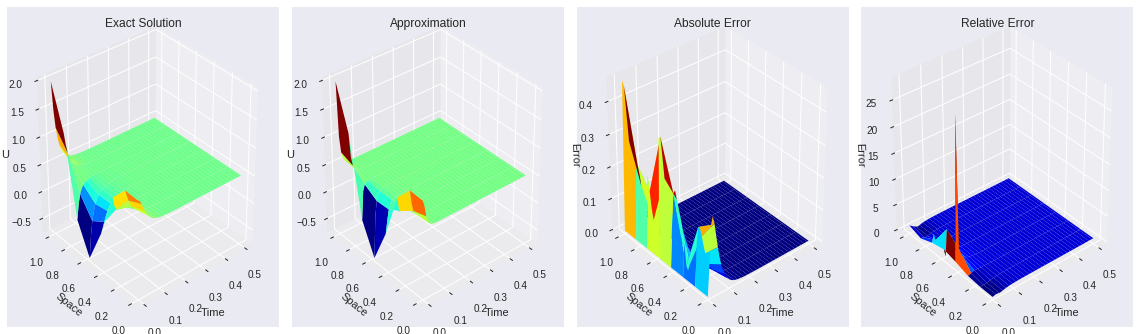

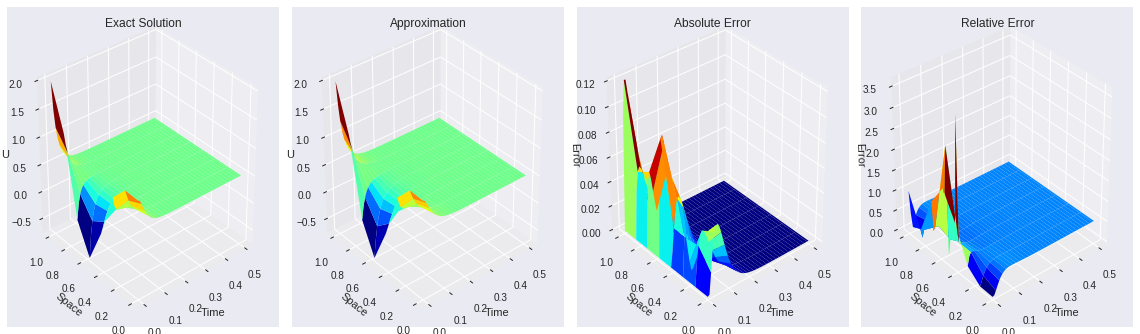

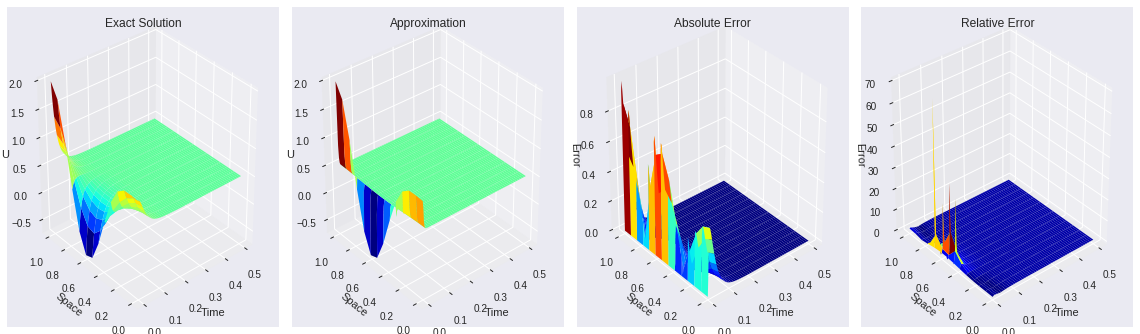

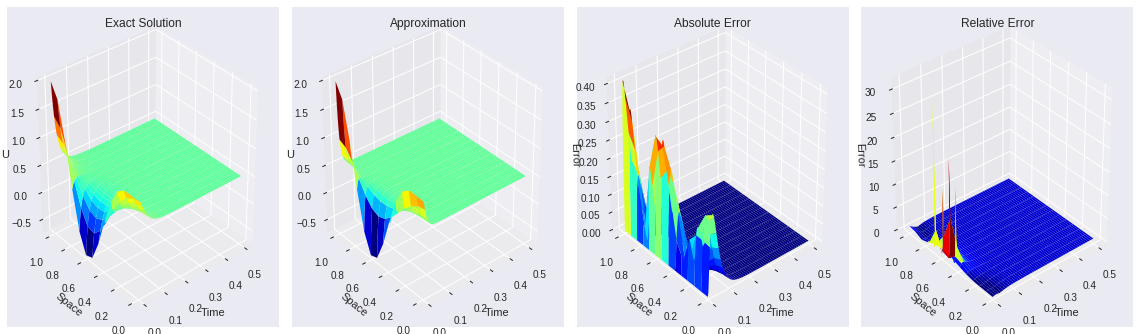

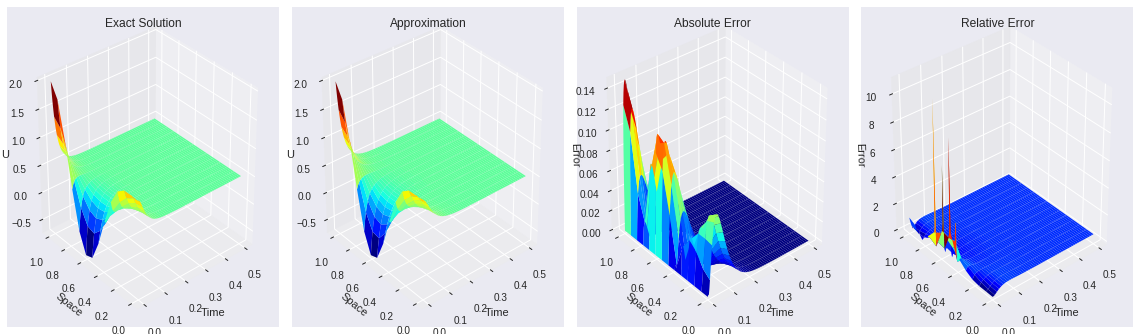

In [103]:
""" 
Comparison:
"""
lambd = [2, 1.0/2.0, 1.0/6.0]
M = [4, 8, 14]
#10, 12,

for i in range(len(M)):
    for j in range(len(lambd)):
        Uexact, x, t = ExactSolution(M[i])
        
        print("<---- M = ", M[i],", N = ", M[i]**2,", Lambda = ",round(lambd[j],2),"---->")
        U_cn, tspanc, xspanc = CrankNicolson(M[i], lambd[j])
        surfaceplot(U_cn, Uexact, tspanc, xspanc,M[i])
        count+=1
        

In [104]:
""" 
Comparison:
"""
lambd = [2, 1.0/2.0, 1.0/6.0]
M = [4, 8, 10, 12, 14]

for i in range(len(M)-1):
    for j in range(len(lambd)):
        Uexact, x, t = ExactSolution(M[i])
        U_ftcs, tspanf, xspanf = ForwardEuler(M[i], lambd[j])
        U_btcs, tspanb, xspanb = BackwardEuler(M[i], lambd[j])
        U_cn, tspanc, xspanc = CrankNicolson(M[i], lambd[j])
        
        print("FTCS error: ",abs(Uexact[-1,:] - U_ftcs[-1,:]))
        print("\nFTCS error: ", np.nanmax(abs(Uexact[-1,:] - U_ftcs[-1,:])))
        
        print("BTCS error: ",abs(Uexact[-1,:] - U_btcs[-1,:]))
        print("\nBTCS error: ", np.nanmax(abs(Uexact[-1,:] - U_btcs[-1,:])))
        
        print("CN error: ",abs(Uexact[-1,:] - U_cn[-1,:]))
        print("\nCN error: ", np.nanmax(abs(Uexact[-1,:] - U_cn[-1,:])))

        #print("<---- M = ", M[i],", N = ", M[i]**2,", Lambda = ",round(lambd[j],2),"---->")
        #print("exact: \n", Uexact)
        #print("FTCS error: \n", abs(Uexact - U_ftcs))
        #print("BTCS error: \n", abs(Uexact - U_btcs))
        #print("CN error: \n", abs(Uexact - U_cn))
    print("<--------------------------------------------------------------->\n\n")

FTCS error:  [2.         0.79410676 0.57328227 0.51936569 0.50517925 0.5013884
 0.50037236 0.50009987 0.50002679 0.50000718 0.50000193 0.50000052
 0.50000014 0.50000004 0.50000001 0.5       ]

FTCS error:  2.0
BTCS error:  [0.00000000e+00 9.56940661e-02 4.67012712e-02 1.57643683e-02
 4.68654832e-03 1.32043480e-03 3.62916238e-04 9.85527383e-05
 2.66023682e-05 7.15885623e-06 1.92345845e-06 5.16376600e-07
 1.38568508e-07 3.71762078e-08 9.97274652e-09 2.67509348e-09]

BTCS error:  0.09569406611463405
CN error:  [0.         1.39728137 0.73939094 0.61905095 0.43810411 0.32963684
 0.24312663 0.18105557 0.13469339 0.1004873  0.07507624 0.05619962
 0.0421424  0.03165766 0.02382265 0.01795736]

CN error:  1.397281367701936
FTCS error:  [2.         0.79410676 0.57328227 0.51936569 0.50517925 0.5013884
 0.50037236 0.50009987 0.50002679 0.50000718 0.50000193 0.50000052
 0.50000014 0.50000004 0.50000001 0.5       ]

FTCS error:  2.0
BTCS error:  [0.00000000e+00 2.72559902e-01 1.42273282e-01 6.315282